In [136]:
################################################
################################################
import pickle as pkl
import networkx as nx 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import pyLDAvis
import pyLDAvis.gensim
import operator
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout
import random
import powerlaw
import copy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import datetime
import dateutil.parser as dateparser
import time
import json
from networkx.readwrite import json_graph
################################################
################################################

In [137]:
westmin = "/datasets/sagarj/TwitterDatasets/westMinConv/"
FBI = "/datasets/sagarj/TwitterDatasets/FBI_Conv/"
Manchester = "/datasets/sagarj/TwitterDatasets/ManchesterConv/"

In [138]:
def convertTimes(dateString):
    dateparser.parse(dateString)
    return int(time.mktime(dateparser.parse(dateString).timetuple()))

def readAllGraphs(directory):
    graphs = {}
    files = os.listdir(directory)
    for f in files:
        key = f.split('.')[0]
        path = directory + f
        graph = json_graph.adjacency_graph(json.load(open(path,'r')))
        for n in graph.nodes(data=True):
            attr = n[1].copy()
            try:
                attr['time'] = convertTimes(n[1]['time'])
                attr['author'] = n[1]['usr']
                attr['affects'] = n[1]['affect']
            except:
                continue
            graph.add_node(n[0],attr)
        graphs[key] = graph
    return graphs
            
            
            

In [139]:
k = json_graph.adjacency_graph(json.load(open("/datasets/sagarj/TwitterDatasets/FBI_Conv/FBI_thread_1002.json",'r')))

In [140]:
nodes = k.nodes(data=True)
print nodes[1][1]

{u'Retweets': u'0', u'Like': u'2', u'time': u'Sun Mar 26 16:41:12 BST 2017', u'affect': 16.67, u'tweet': u"Honestly. They're a bunch of thugs.", u'usr': u'eileendefreest'}


In [141]:
dateString = "Sun Mar 26 09:50:55 BST 2017"
dateparser.parse(dateString)
time.mktime(dateparser.parse(dateString).timetuple())

datetime.datetime(2017, 3, 26, 9, 50, 55, tzinfo=tzlocal())

1490518255.0

In [142]:
FBI_threads = readAllGraphs(FBI)
Manchester_threads = readAllGraphs(Manchester)
Westmin_threads = readAllGraphs(westmin)

In [143]:
FBI_threads[FBI_threads.keys()[19]].nodes(data=True)

[(u'691404798382354432',
  {u'Like': u'0',
   u'Retweets': u'0',
   u'affect': 0.0,
   u'affects': 0.0,
   u'author': u'MarcusPun',
   u'time': 1453678724,
   u'tweet': u"@NewsWorldWide1 well then pass it on. Santilli looks like very bad rookie TV reporter ever on air. Pro opinion. it's comical - SNL fodder.",
   u'usr': u'MarcusPun'}),
 (u'691403557174689794',
  {u'Like': u'0',
   u'Retweets': u'0',
   u'affect': 6.25,
   u'affects': 6.25,
   u'author': u'NewsWorldWide1',
   u'time': 1453678428,
   u'tweet': u'@MarcusPun btw I did not create the vids. I am just a news agragation checking system',
   u'usr': u'NewsWorldWide1'}),
 (u'691407687129632768',
  {u'Like': u'0',
   u'Retweets': u'0',
   u'affect': 0.0,
   u'affects': 0.0,
   u'author': u'NewsWorldWide1',
   u'time': 1453679413,
   u'tweet': u'@MarcusPun the fbi are acting as communists so the headline is accurate..',
   u'usr': u'NewsWorldWide1'}),
 (u'691375870230020096',
  {u'Like': u'0',
   u'Retweets': u'0',
   u'affect': 

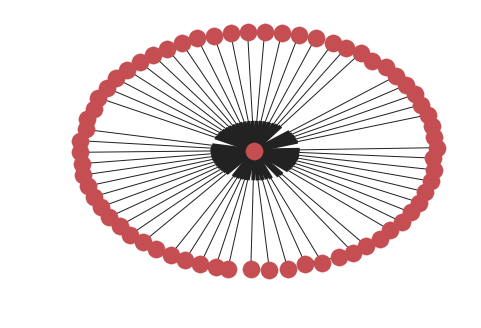

In [144]:
nx.draw(FBI_threads[FBI_threads.keys()[10]])

In [145]:
	def sanitizeText( text):
		return text.encode('utf8').replace('\n', '').replace('\r', '')

In [146]:
data = pd.read_csv("/datasets/dk/twitter-datasets/twitter-suicides-clean/replies-v3/suicides-replies.csv", \
                   encoding = "utf-8", index_col = False, warn_bad_lines = True, sep = ",")

In [147]:
data.columns

Index([u'id', u'text', u'userId', u'userName', u'userScreenName', u'createdAt',
       u'retweets', u'favs', u'replyTo', u'thread'],
      dtype='object')

In [148]:
data.head(1000)

,id,text,userId,userName,userScreenName,createdAt,retweets,favs,replyTo,thread
0,647435309144145920,I feel empty.,232004927,Saabannaaa,Saabannaaa,25/09/2015 15:39:41,0,0,NaN,647435309144145920
1,647438846439780352,@Saabannaaa this is emptypic.twitter.com/xcf9m...,1498580004,タイパー家,Ek_House3,25/09/2015 16:53:44,0,0,6.474353e+17,647435309144145920
2,647438999653511168,@Ek_House3 I'm sorry,232004927,savanna sanchez,Saabannaaa,25/09/2015 16:54:21,0,0,6.474388e+17,647435309144145920
3,647443720305033216,I feel like drowning my feelings in alcohol 😖😞...,2508051271,GhostGma,GhostGma,25/09/2015 16:13:06,0,0,NaN,647443720305033216
4,647471971354214400,@GhostGma don't do it. ..it won't help you,2322471627,cooper sharpe,radicalcoop,25/09/2015 19:05:22,0,0,6.474437e+17,647443720305033216
5,647472808918917120,@radicalcoop it's the only thing I can think o...,2508051271,zack,GhostGma,25/09/2015 19:08:41,0,0,6.474720e+17,647443720305033216
6,647476810201104384,@GhostGma you must have some friends to Lea on,2322471627,cooper sharpe,radicalcoop,25/09/2015 19:24:35,0,0,6.474728e+17,647443720305033216
7,647476967986581504,@radicalcoop not where I live and everyone els...,2508051271,zack,GhostGma,25/09/2015 19:25:13,0,0,6.474768e+17,647443720305033216
8,647477990738296832,@GhostGma dm me,2322471627,cooper sharpe,radicalcoop,25/09/2015 19:29:17,0,0,6.474770e+17,647443720305033216
9,647444883347632129,why do i feel so empty lol,44849411,N_Jiaee,N_Jiaee,25/09/2015 16:17:43,0,0,NaN,647444883347632129


In [149]:
threads = data.groupby('thread')

In [150]:
len(threads.groups.keys())

15846

In [151]:
def getScaledSizes(graph):
    affects = nx.get_node_attributes(graph, 'affects')
    s = [int(affects[v]) for v in graph.nodes()]
    normed = [i + 10 for i in s]
    scaled = [v*(2^(v-np.min(normed)))+100 for v in normed]
    return scaled

def drawReplyGraph(graph):
    cascadeGraph = graph
    sizes = getScaledSizes(cascadeGraph)
    pos = graphviz_layout(cascadeGraph, prog='neato')

    usr = list(set(nx.get_node_attributes(cascadeGraph, 'author').values()))
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in cascadeGraph:
        c = usr.index(cascadeGraph.node[node]['author'])
        colorMap.append(color[c])
        lls[node] = cascadeGraph.node[node]['author']
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 10)
    nx.draw(cascadeGraph,pos=pos ,node_size=sizes ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()


def drawUserGraph(graph):
    ugraph = graph
    pos = graphviz_layout(ugraph, prog='neato')

    usr = ugraph.nodes()
    print len(usr)
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in ugraph:
        c = usr.index(node)
        colorMap.append(color[c])
        lls[node] = node
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 10)
    #
    nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()
    
def createUserGraphs(allGraphs,deletedUsers=None):
    userGraphs = {}
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        times = nx.get_node_attributes(allGraphs[i],'time')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                print "Found Edge with deleted source"
                time = times[e[1]]
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                print "Found Edge with deleted destination"
                time = times[e[0]]
                src = nodes[e[0]]
                dst = "deleted"
            else:
                time = times[e[0]]
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=1 , timestamp = time)
            else:
                userGraph[src][dst]['weight'] += 1
                if time > userGraph[src][dst]['timestamp']:
                    print "Found a later message"
                    userGraph[src][dst]['timestamp'] = time
        userGraphs[i] = userGraph
    return userGraphs
    
def makeReplyGraph(group):
    op = None
    graph = nx.DiGraph()
    pattern = '%d/%m/%Y %H:%M:%S'
    for idx, row in group.iterrows():
        propertyDict = {'author' : row['userId'] , 'pop' : row['favs'] , 
                        'text' : row['text'] ,
#                         'time':  time.mktime(time.strptime(row['createdAt'], pattern)) , 'affects' : row['sen_pos'] + row['sen_neg']  }
#                         'time':  time.mktime(dateparser.parse(row['createdAt']).timetuple()), 'affects' : row['sen_pos'] + row['sen_neg']  }
                        'time':  time.mktime(dateparser.parse(row['createdAt']).timetuple())  }
                        
        
#         if row['id'] not in graph.nodes():
        if not graph.has_node(int(row['id'])):
            graph.add_node(int(row['id']) , propertyDict )
        if not pd.isnull(row['replyTo']):
            try:
                graph.add_edge(int(row['id']), int(row['replyTo']) , weight=1 )
            except:
                to = row['replyTo'].split('?')[0]
                graph.add_edge(int(row['id']), int(to) , weight=1 )
        else:
            op = row['userId']
        
    return graph , op

def getOp(replyGraph):
    degrees = replyGraph.out_degree()
    for n in degrees:
        if degrees[n] == 0:
            authors = nx.get_node_attributes(replyGraph,'author')
            return authors[n]
        
def getOpDict(ReplyGraphs):
    opDict = {}
    for k in ReplyGraphs:
        op = getOp(ReplyGraphs[k])
        opDict[k] = op
    return opDict

def sanitize_for_self_loops(replygraph):
    loop_edges = replygraph.selfloop_edges()
    print "found %d self loops"%len(loop_edges)
    replygraph.remove_edges_from(loop_edges)

def removeSelfEdges(replyGraphs):
    for k in replyGraphs:
        sanitize_for_self_loops(replyGraphs[k])

In [152]:
ReplyGraphs_all = {}
opDict_all = {}
for name , group in threads:
    ReplyGraphs_all[name] , opDict_all[name] = makeReplyGraph(group)
    
                    

In [153]:
removeSelfEdges(Manchester_threads)

found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self

found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self

found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self

found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self

In [154]:
removeSelfEdges(FBI_threads)

found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self loops
found 1 self

In [155]:
opDict_westmin = getOpDict(Westmin_threads)
opDict_Manchester = getOpDict(Manchester_threads)
opDict_FBI = getOpDict(FBI_threads)

In [156]:
len(opDict_westmin) , len(opDict_Manchester), len(opDict_FBI)

(1199, 4869, 1020)

In [157]:
def findComps(G):
    components = [k for k in nx.weakly_connected_components(G)]
    return len(components)

filteredKeys = [k for k in ReplyGraphs_all if findComps(ReplyGraphs_all[k]) == 1]

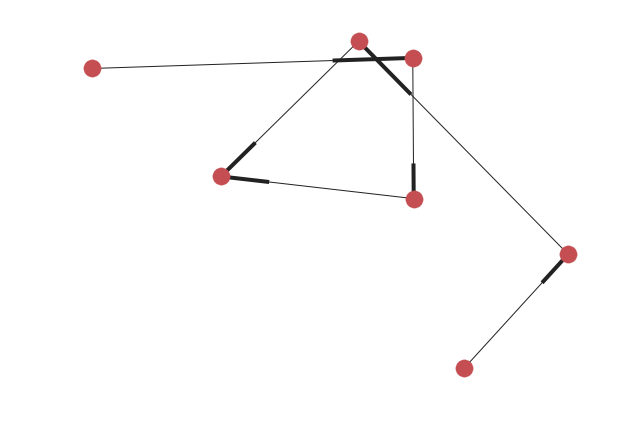

In [269]:
nx.draw(ReplyGraphs_all[filteredKeys[250]])

In [159]:
ReplyGraphs = {}
opDict = {}
for k in filteredKeys:
    ReplyGraphs[k] = ReplyGraphs_all[k]
    opDict[k] = opDict_all[k]

In [160]:
len(ReplyGraphs)

5413

In [161]:
UserGraphs = createUserGraphs(ReplyGraphs)

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

In [162]:
UserGraphs_FBI = createUserGraphs(FBI_threads)

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

In [163]:
UserGraphs_Manchester = createUserGraphs(Manchester_threads)

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found Edge with deleted source
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
F

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

In [164]:
UserGraphs_Westmin = createUserGraphs(Westmin_threads)

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

In [165]:
# opDict_FBI

In [166]:
filteredKeys = [k for k in UserGraphs if len(UserGraphs[k].nodes()) > 2]

In [167]:
len(filteredKeys)

412

In [168]:
opDict[filteredKeys[70]]

u'1012433521'

In [169]:
ReplyGraphs[filteredKeys[70]].nodes(data=True)

[(680481418296819712,
  {u'author': u'1012433521',
   u'pop': 0,
   u'text': u'why do I feel so depressed',
   u'time': 1451074387.0}),
 (680481566443847680,
  {u'author': u'1331419513',
   u'pop': 0,
   u'text': u"@3ndowh_ what's wrong :(",
   u'time': 1451074422.0}),
 (680482071098322944,
  {u'author': u'1012433521',
   u'pop': 0,
   u'text': u'@7amdahals nothingg:(( mwah',
   u'time': 1451074543.0}),
 (680481979859644416,
  {u'author': u'3145332325',
   u'pop': 1,
   u'text': u'@3ndowh_ I love you',
   u'time': 1451074521.0}),
 (680482282386407424,
  {u'author': u'1012433521',
   u'pop': 0,
   u'text': u'@shammaalh__ 3umry',
   u'time': 1451074593.0})]

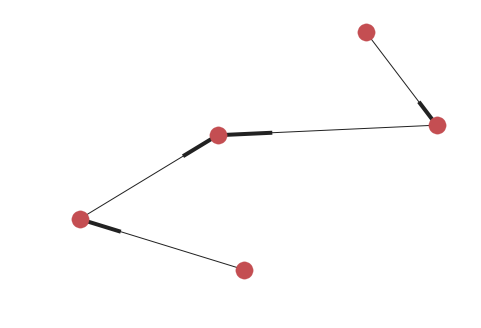

In [170]:
# drawReplyGraph(ReplyGraphs[filteredKeys[70]])
nx.draw(ReplyGraphs[filteredKeys[70]])

3


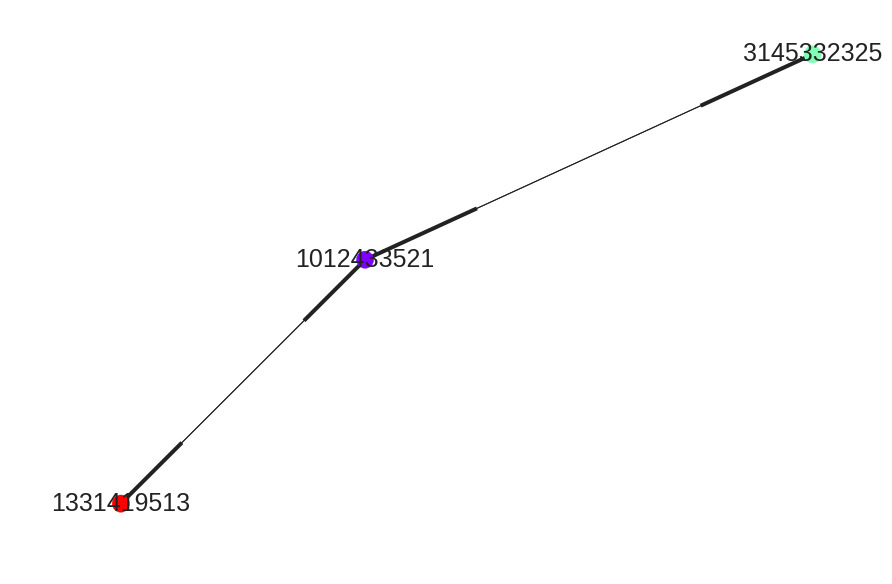

In [171]:
drawUserGraph(UserGraphs[filteredKeys[70]])

In [172]:
Manchester_threads[Manchester_threads.keys()[3]].selfloop_edges()

[]

In [173]:
getOp(Westmin_threads[Westmin_threads.keys()[1]])

u'HasanSari7'

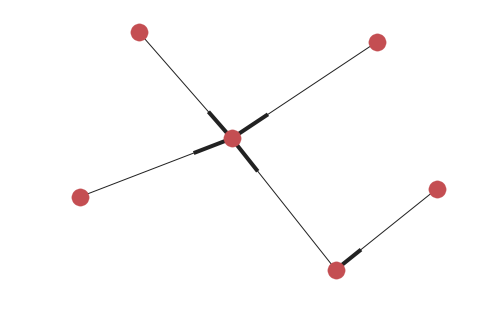

In [174]:
nx.draw(Manchester_threads[Manchester_threads.keys()[3]])

In [175]:
FBI_threads[FBI_threads.keys()[10]].nodes(data=True)

[(u'862133258963865601',
  {u'Like': u'3',
   u'Retweets': u'0',
   u'affect': -3.45,
   u'affects': -3.45,
   u'author': u'sevntiseven',
   u'time': 1494383561,
   u'tweet': u"It is always like that with Trump. It's just nasty to get rid of someone that is working across the country and see it in a news flash, no.",
   u'usr': u'sevntiseven'}),
 (u'862113474570276865',
  {u'Like': u'4',
   u'Retweets': u'2',
   u'affect': 0.0,
   u'affects': 0.0,
   u'author': u'Tarheel2302',
   u'time': 1494378844,
   u'tweet': u'Anyone who lies to congress under oath i.e. Jeff Sessions is not to be trusted.',
   u'usr': u'Tarheel2302'}),
 (u'862105797588865025',
  {u'Like': u'2',
   u'Retweets': u'1',
   u'affect': -16.67,
   u'affects': -16.67,
   u'author': u'tbod4u',
   u'time': 1494377013,
   u'tweet': u'JEdgar is cartwheeling in his grave !!!!!!!',
   u'usr': u'tbod4u'}),
 (u'862105544592695297',
  {u'Like': u'7',
   u'Retweets': u'2',
   u'affect': -5.88,
   u'affects': -5.88,
   u'author': u'

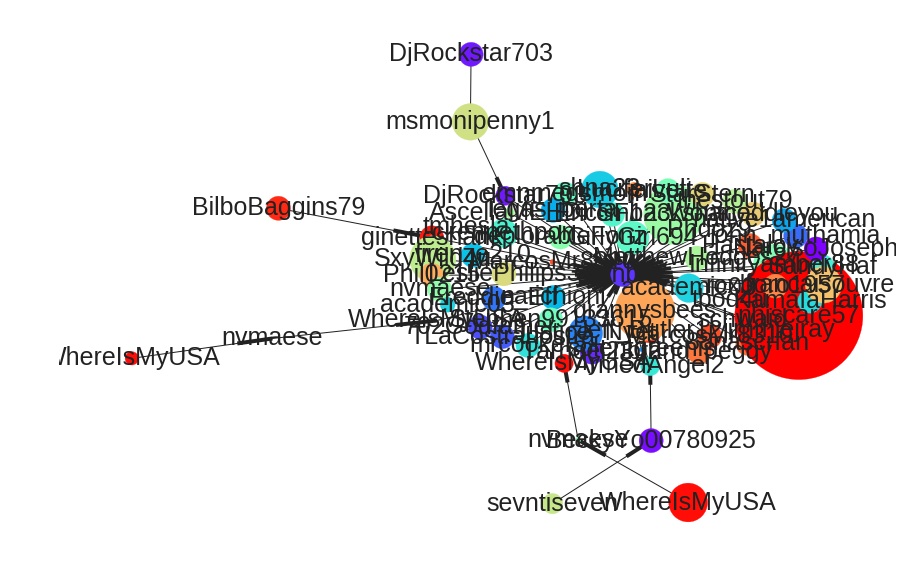

In [176]:
drawReplyGraph(FBI_threads[FBI_threads.keys()[10]])

In [177]:
nx.all_pairs_shortest_path(Westmin_threads[Westmin_threads.keys()[10]])

{u'845298280296787968': {u'845298280296787968': [u'845298280296787968']},
 u'845301307003015178': {u'845298280296787968': [u'845301307003015178',
   u'845298280296787968'],
  u'845301307003015178': [u'845301307003015178']},
 u'845304043526410240': {u'845298280296787968': [u'845304043526410240',
   u'845298280296787968'],
  u'845304043526410240': [u'845304043526410240']},
 u'845305173668974594': {u'845298280296787968': [u'845305173668974594',
   u'845298280296787968'],
  u'845305173668974594': [u'845305173668974594']},
 u'845305273770237953': {u'845298280296787968': [u'845305273770237953',
   u'845298280296787968'],
  u'845305273770237953': [u'845305273770237953']},
 u'845305543367512065': {u'845298280296787968': [u'845305543367512065',
   u'845305173668974594',
   u'845298280296787968'],
  u'845305173668974594': [u'845305543367512065', u'845305173668974594'],
  u'845305543367512065': [u'845305543367512065']},
 u'845306068381175809': {u'845298280296787968': [u'845306068381175809',
   u'

4


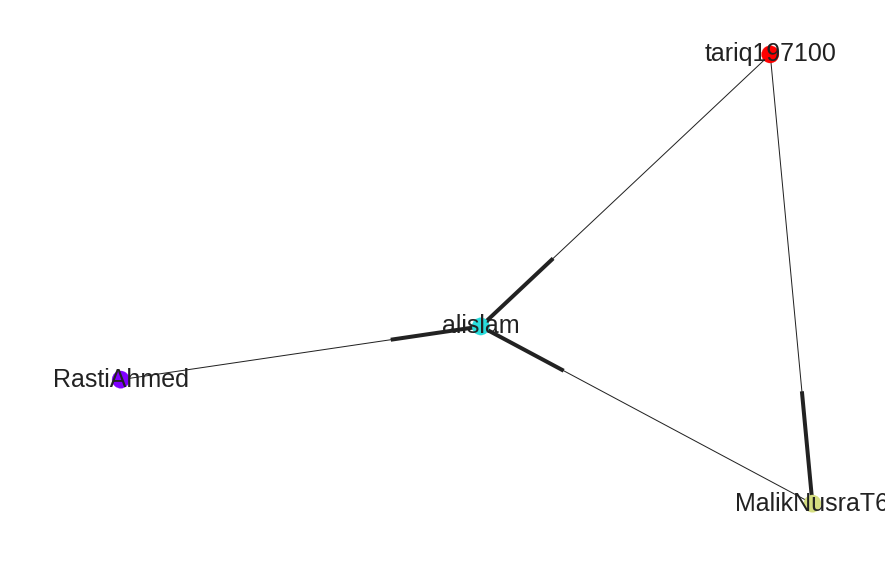

In [178]:
drawUserGraph(UserGraphs_Westmin[Westmin_threads.keys()[120]])

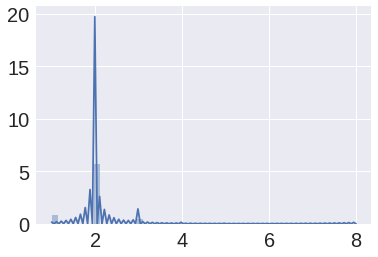

In [179]:
sizes = [len(UserGraphs[k].nodes()) for k in UserGraphs]
sns.distplot(sizes)

In [180]:
float(len([k for k in sizes if k == 2.0]))/float(len(sizes))

0.8023277295399963

In [181]:
len(sizes)

5413

In [182]:
len(filteredKeys)

412

In [183]:
def getAllTimeDifferences(replyGraphs):
    timeDiffs = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        for e in g.edges():
            if (e[0] not in times) or (e[1] not in times):
                print " Time not found"
                continue
            try:    
                timeDiff = times[e[0]] - times[e[1]]
            except:
                continue
            if timeDiff == 0 or timeDiff < 0:
                timeDiff = 1
            timeDiffs.append(float(timeDiff)/60.0)
    return timeDiffs

def getTimeDistribution(replyGraphs,opAuthors):
    timeDist = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        for e in g.edges():
            if k not in opAuthors:
                print "Not the correct oplist "
                continue
            if e[1] not in authors:
                print "Author not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if e[0] in times:
                    try:
                        timeDiff = times[e[0]] - times[e[1]]
                        if timeDiff == 0 or timeDiff < 0:
                            timeDiff = 1
                    except:
                        timeDiff = 1
                    timeDist.append(float(timeDiff)/60.0)
    return timeDist

def getSymmetricBehaviour(filteredUserGraphs,opAuthors):
    messageParti = []
    userParti = []
    BPusers = {}
    for k in filteredUserGraphs:
        g = filteredUserGraphs[k]
        BPuser = 0
        BPmsges = 0

        BPusers[k] = []
        for (u,v) in g.edges():
            if u != v :          
                toMsgs = 0
                fromEdges = 0
                if v == opAuthors[k]:
                    if u in g[v]:
                        BPuser +=1
#                         print k , v , u
                        BPusers[k].append(u)
                        toMsgs = g.get_edge_data(u,v)['weight']
                        fromEdges = g.get_edge_data(v,u)['weight']
                        BPmsges= BPmsges + min(2*toMsgs,fromEdges)
        if len(g.nodes()) == 0:
#             print g.edges()
            continue
        userParti.append(float(BPuser)/float(len(g.nodes())))
        edgeWeights = sum([edge[2]['weight'] for edge in g.edges(data=True)])
        messageParti.append(float(BPmsges)/float(edgeWeights))
    return messageParti , userParti, BPusers

def getOriginalTweet(replyGraph):
    degrees = replyGraph.out_degree()
    for n in degrees:
        if degrees[n] == 0:
            return n
    print "Original tweet not found!!"
    return None

import collections
def getBranchingFactor(replyGraphDict):
    branchingFactor = {}
    depthOd = {}
    for k in replyGraphDict:
        depthDict = {}
        repGraph = replyGraphDict[k]
        orginalTweet = getOriginalTweet(repGraph)
        all_paths = nx.all_pairs_shortest_path(repGraph)
        for k in all_paths:
            if orginalTweet in all_paths[k]:
                path_to_root = all_paths[k][orginalTweet]
                depth = len(path_to_root)
                if depth not in depthDict:
                    depthDict[depth] = []
                depthDict[depth].append(k)
        od = collections.OrderedDict(sorted(depthDict.items()))
#         print od
        depthOd[k] = od
        lengths = []
        for key, value in od.items():
            lengths.append(len(value))
        diffs = [float(t)/float(s) for s, t in zip(lengths, lengths[1:])]
        if len(diffs) < 3:
            continue
        branchingFactor[k] = [np.mean(diffs) , np.median(diffs) , np.max(diffs)]
#         branchingFactor[k] = diffs
    return branchingFactor , depthOd



def findMedianCentrality(graph):
    return np.median(nx.closeness_centrality(graph.to_undirected()).values())

def getMetrics(graphDict,opDict=None):
    metricDict = {}
    opCentrality = []
    
    for k in graphDict:
        metricDict[k] = {}
        centralities = nx.closeness_centrality(graphDict[k].to_undirected())
        medCentrality = np.median(centralities.values())
        
        if opDict:
            if k in opDict and opDict[k] in centralities:
                if opDict[k] == '[deleted]':
                    print "op was Deleted"
                else:
                    metricDict[k]['opCentrality'] = centralities[opDict[k]]
        if np.isnan(medCentrality):
            print "Found Nan centrality"
            continue
        else:
            metricDict[k]['medCentrality'] = medCentrality
        
    return metricDict

In [184]:
urgency_FBI = getAllTimeDifferences(FBI_threads)
urgency_Manchester = getAllTimeDifferences(Manchester_threads)
urgency_Westmin = getAllTimeDifferences(Westmin_threads)

In [185]:
urgency = getAllTimeDifferences(ReplyGraphs)

 Time not found
 Time not found


In [186]:
urgency_OP = getTimeDistribution(ReplyGraphs,opDict)
urgency_OP_Machester = getTimeDistribution(Manchester_threads,opDict_Manchester)
urgency_OP_Westmin = getTimeDistribution(Westmin_threads,opDict_westmin)

Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not found
Author not fou

In [187]:
len(urgency_OP)

9606

In [188]:
len(urgency_FBI), len(urgency_Manchester),len(urgency_Westmin)

(14850, 71153, 4841)

In [189]:
len(urgency_OP_Westmin), len(urgency_OP_Machester)

(4044, 61323)

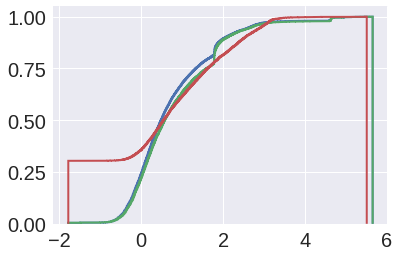

In [190]:
n1 , bins1 , patches1 = plt.hist(np.log10(urgency), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(urgency_OP), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
# n3 , bins3 , patches3 = plt.hist(np.log10(urgency_, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n4 , bins4 , patches4 = plt.hist(np.log10(urgency_FBI), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
# n5 , bins5 , patches5 = plt.hist(np.log10(urgency_Westmin), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)



(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 11 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

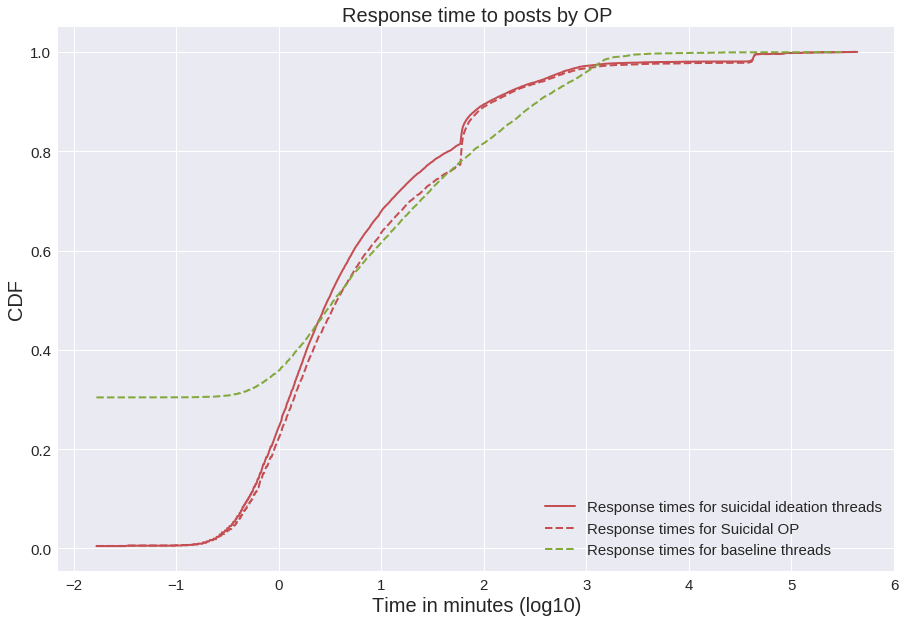

In [191]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'r', linewidth=2)
ax.plot(bins2[:-1], n2, 'r--', linewidth=2)
# ax.plot(bins3[:-1], n3, 'g', linewidth=2)
ax.plot(bins4[:-1], n4, 'g--', linewidth=2)
# ax.plot(bins5[:-1], n5, 'y', linewidth=2)

plt.title("Response time to posts by OP", fontsize = 20)
plt.xlabel("Time in minutes (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Response times for suicidal ideation threads',  'Response times for Suicidal OP','Response times for baseline threads' ,'Response times for baseline OP'], loc='lower right',fontsize=15)
# plt.legend(['Response times for suicidal ideation threads', 'Response times for baseline threads' ], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [192]:
# np.median(urgency_OP) , np.median(urgency_FBI), np.median(urgency_Manchester),np.median(urgency_Westmin)
np.median(urgency) , np.median(urgency_OP) , np.median( urgency_Manchester + urgency_Westmin) , np.median(urgency_OP_Machester + urgency_OP_Westmin), np.median(urgency_FBI)

(3.066666666666667,
 3.783333333333333,
 17.383333333333333,
 19.816666666666666,
 3.5166666666666666)

In [193]:
Suicide_messageParti , Suicide_userParti , _ = getSymmetricBehaviour(UserGraphs,opDict)

In [194]:
Westmin_messageParti , Westmin_userParti , _ = getSymmetricBehaviour(UserGraphs_Westmin,opDict_westmin)

In [195]:
Manchester_messageParti , Manchester_userParti , _ = getSymmetricBehaviour(UserGraphs_Manchester,opDict_Manchester)

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 <a list of 8 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

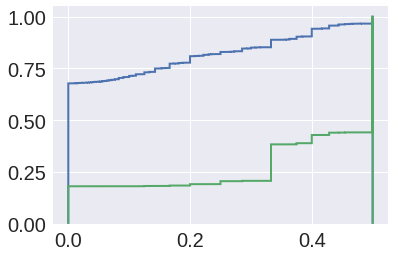

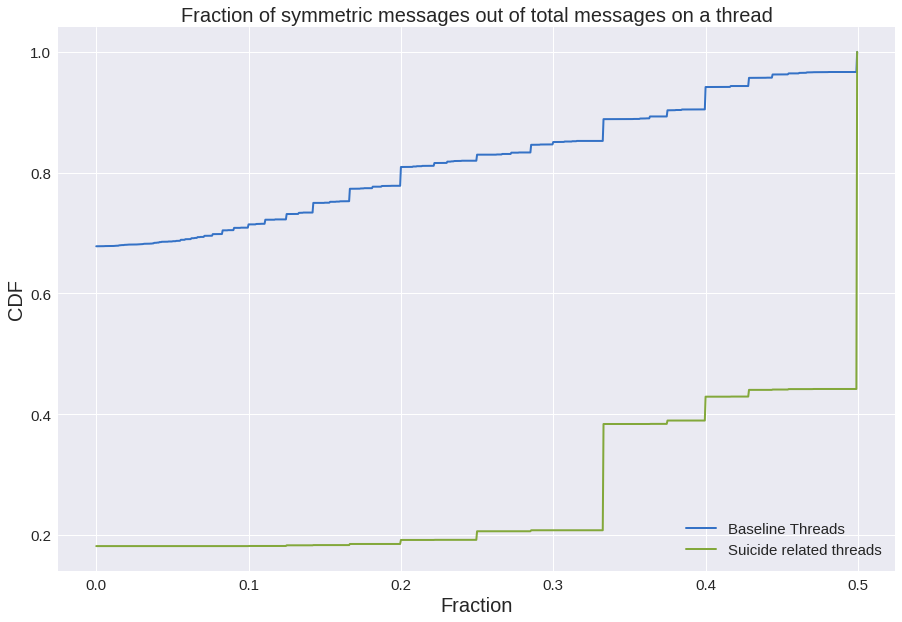

In [197]:
n1 , bins1 , patches1 = plt.hist(Westmin_messageParti + Manchester_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(Suicide_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'b', linewidth=2)
ax.plot(bins2[:-1], n2, 'g', linewidth=2)

plt.title("Fraction of symmetric messages out of total messages on a thread", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Baseline Threads','Suicide related threads'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

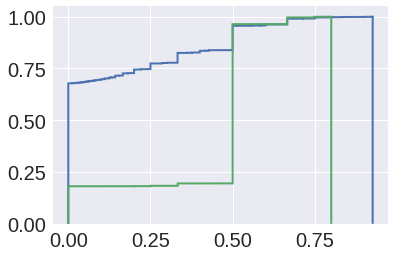

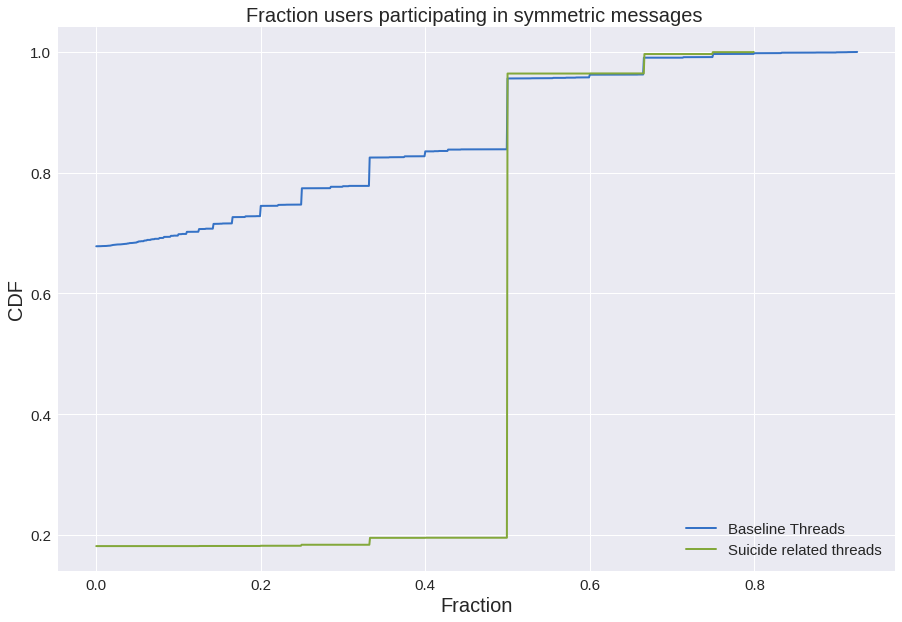

In [198]:
n1 , bins1 , patches1 = plt.hist(Westmin_userParti + Manchester_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(Suicide_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bins1[:-1], n1, 'b', linewidth=2)
ax.plot(bins2[:-1], n2, 'g', linewidth=2)

plt.title("Fraction users participating in symmetric messages ", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Baseline Threads','Suicide related threads'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [199]:
print np.median(Suicide_userParti) , np.median(Westmin_userParti + Manchester_userParti)

0.5 0.0


In [200]:
print np.median(Suicide_messageParti) , np.median(Westmin_messageParti + Manchester_messageParti)

0.5 0.0


In [201]:
Suicide_branching, ordered_Suicide = getBranchingFactor(ReplyGraphs)

In [202]:
Manchester_branching,ordered_Man = getBranchingFactor(Manchester_threads)

In [207]:
Westmin_branching,ordered_Westmin = getBranchingFactor(Westmin_threads)
FBI_branching,ordered_FBI = getBranchingFactor(FBI_threads)

In [208]:
len(Manchester_branching) , len(Suicide_branching)

(2188, 2231)

In [209]:
len(ordered_Suicide) , len(ordered_Man)

(5398, 4215)

In [210]:
ordered_Westmin[ordered_Westmin.keys()[1101]]

OrderedDict([(1, [u'845216831740821511']), (2, [u'845246550037200896'])])

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
 <a list of 7 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

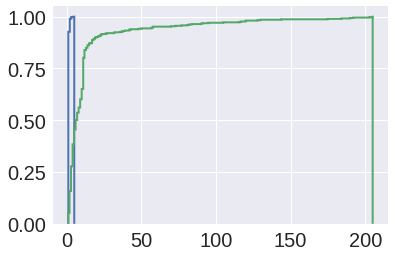

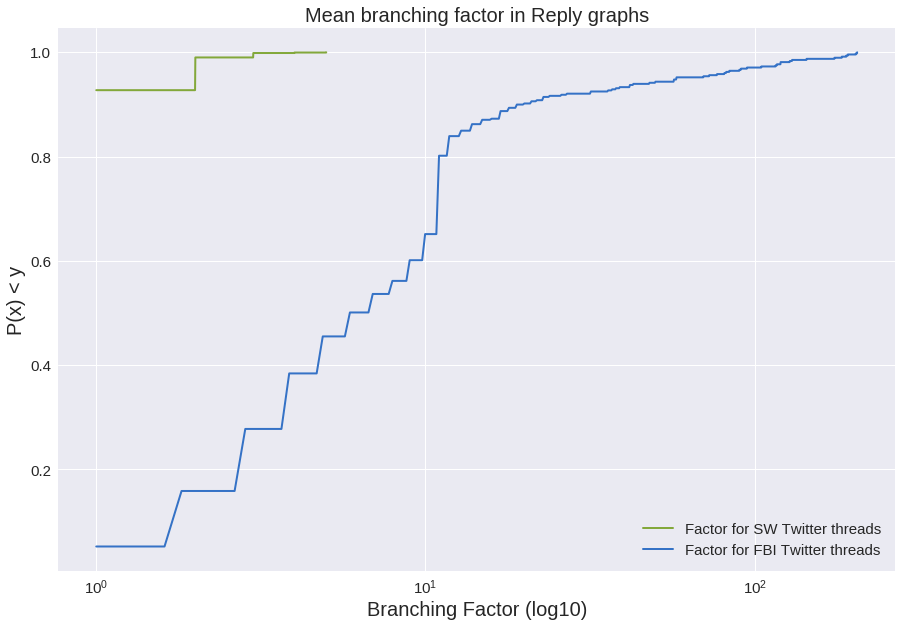

In [211]:
n1 , bins1 , patches1 = plt.hist([Suicide_branching[k][2] for k in Suicide_branching], 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist([FBI_branching[k][2] for k in FBI_branching], 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

# n1 , bins1 , patches1 = plt.hist([i for k in Suicide_branching for i in Suicide_branching[k]], 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
# n2 , bins2 , patches2 = plt.hist([i for k in Manchester_branching for i in Manchester_branching[k]], 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'g', linewidth=2)
ax.plot(bins2[:-1], n2, 'b', linewidth=2)
ax.set_xscale('log')
plt.title("Mean branching factor in Reply graphs", fontsize = 20)
plt.xlabel("Branching Factor (log10)",fontsize = 20)
plt.ylabel("P(x) < y",fontsize = 20)
plt.legend(['Factor for SW Twitter threads','Factor for FBI Twitter threads'], loc='top left',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

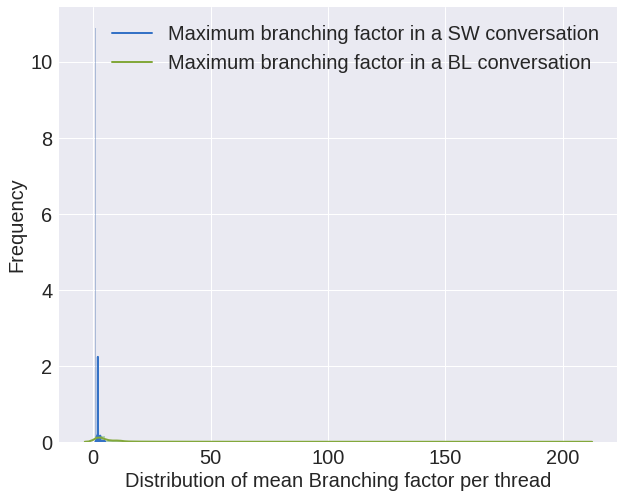

In [212]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.set(font_scale=2) 
sns.distplot([Suicide_branching[k][2] for k in Suicide_branching],kde_kws={"color": "b", "lw": 2, "label": "Maximum branching factor in a SW conversation"})
sns.distplot([Manchester_branching[k][2] for k in Manchester_branching],kde_kws={"color": "g", "lw": 2, "label": "Maximum branching factor in a BL conversation"})
plt.xlabel("Distribution of mean Branching factor per thread" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

In [213]:
metricDict_SW = getMetrics(UserGraphs,opDict)

In [214]:
metricDict_Westmin = getMetrics(UserGraphs_Westmin , opDict_westmin)

In [215]:
metricDict_Manchester = getMetrics(UserGraphs_Manchester, opDict_Manchester)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

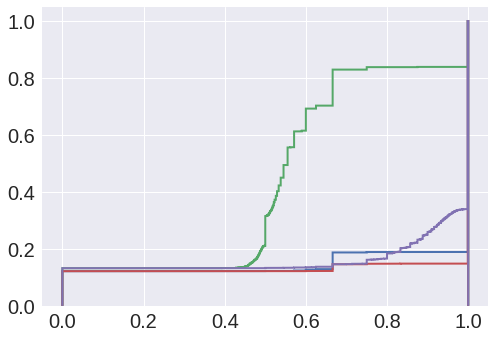

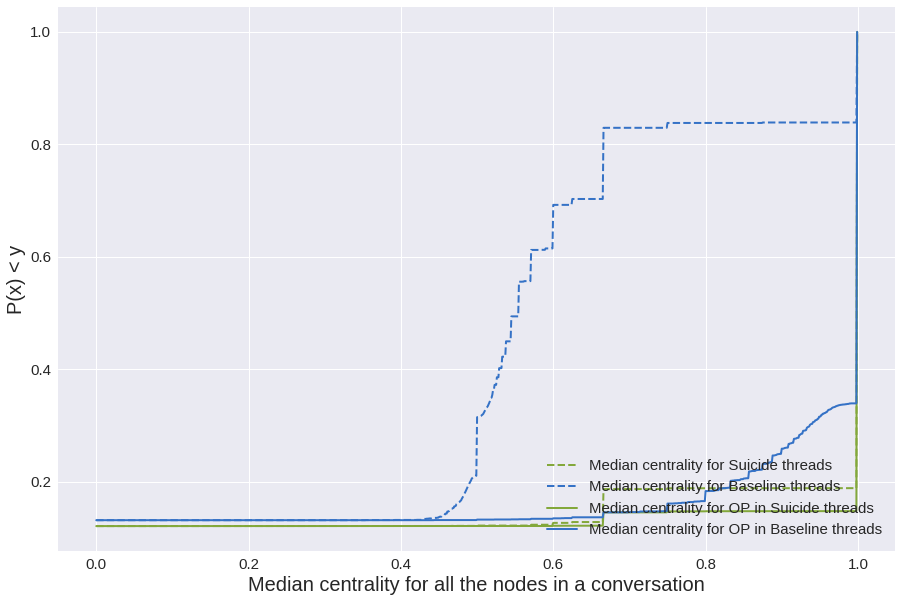

In [216]:
n1_all , bins1_all , patches1 = plt.hist([metricDict_SW[k]['medCentrality'] for k in metricDict_SW], 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2_all , bins2_all , patches2 = plt.hist([metricDict_Manchester[k]['medCentrality'] for k in metricDict_Manchester], 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n1 , bins1 , patches1 = plt.hist([metricDict_SW[k]['opCentrality'] for k in metricDict_SW], 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist([metricDict_Manchester[k]['opCentrality'] for k in metricDict_Manchester], 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1_all[:-1], n1_all, 'g--', linewidth=2)
ax.plot(bins2_all[:-1], n2_all, 'b--', linewidth=2)
ax.plot(bins1[:-1], n1, 'g', linewidth=2)
ax.plot(bins2[:-1], n2, 'b', linewidth=2)

plt.xlabel("Median centrality for all the nodes in a conversation",fontsize = 20)
plt.ylabel("P(x) < y",fontsize = 20)
plt.legend(['Median centrality for Suicide threads','Median centrality for Baseline threads','Median centrality for OP in Suicide threads','Median centrality for OP in Baseline threads'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [217]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from gensim.models.ldamulticore import *
import gensim
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer
import spacy
from spacy.lang.en import English
from __future__ import unicode_literals


class Tokenizer:
    def __init__(self):
#         print "Created Tokenizer"
        self.regExTknizr = RegexpTokenizer(r'\w+')
        self.tweetTknizr = TweetTokenizer()
        self.treebankTknizer = TreebankWordTokenizer()
        nlp = English()
#         self.spacytokenizer = English().Defaults.create_tokenizer(nlp)
        self.spacytokenizer = nlp.tokenizer
        
    def tokenizeByRegEx(self , text):
        return self.regExTknizr.tokenize(text)
    
    def tokenizeTweets(self,text):
        return self.tweetTknizr.tokenize(text)
    
    def simpleTokenizer(self, text):
        return text.strip().split()

    def gensimTokenizer(self , text):
        return gensim.utils.simple_tokenize(text)
    
    def wordTokenizer(self, text):
        return word_tokenize(text.strip())
    
    def treebankTokenize(self, text):
        return self.treebankTknizer.tokenize(text.strip())
    
    def spacyTokenize(self,text):
        return self.spacytokenizer(text.strip())

    
    
# create English stop words list
en_stop = get_stop_words('en')
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

def check(u1 , ulist):
    if u1 in ulist:
        return True
    else:
        return False

def getOPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if g.node[node]['author'] == users[k]:
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getAllText(replyGraphs):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'text' not in g.node[node]:
                print g.node[node]
                continue
            if g.node[node]['text'] == '[deleted]':
                continue
#             texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
            texts.append(g.node[node]['text'])
    return texts

def getAllTextTweets(replyGraphs):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'tweet' not in g.node[node]:
                print g.node[node]
                continue
            if g.node[node]['tweet'] == '[deleted]':
                continue
#             texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
            texts.append(g.node[node]['tweet'])
    return texts

def tokenizeTexts(testList):
    # list for tokenized documents in loop
    toc_texts = []
    # loop through document list
    tokenizer = Tokenizer()
    for i in testList:
        # clean and tokenize document string
        try:
            raw = i.lower()
        except:
            print i
        tokens = tokenizer.spacyTokenize(raw)
#         print tokens
        # remove stop words from tokens
        stopped_tokens = [i.orth_ for i in tokens if not i.orth_ in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        toc_texts.append(stemmed_tokens)
    return toc_texts

def tokenizeTextsSpacy(textList):
    toc_texts = []
    tokenizer = Tokenizer()
    for i in textList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.spacyTokenize(raw)
        cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
        toc_texts.append(cleaned_tokens)
    return toc_texts

def getTextTopicsSpacy(text,model):
    tokenizer = Tokenizer()
    raw = text.lower()
    tokens = tokenizer.spacyTokenize(raw)
    cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
    topics = model.get_document_topics(dictionary.doc2bow(cleaned_tokens))
    return topics

def getdocVec(text,model):
    tokenizer = Tokenizer()
    raw = text.lower()
    tokens = tokenizer.spacyTokenize(raw)
    cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
    vector = model.infer_vector(cleaned_tokens)
    return vector

def convertToNpVec(topicvec, shape):
    vec = np.zeros(shape)
    for t in topicvec:
        vec[t[0]] = t[1]
    return vec


def getTextTopics(text,model):
    raw = text.lower()
    tokenizer = Tokenizer()
    tokens = tokenizer.tokenizeByRegEx(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
#     print stemmed_tokens
    topics = convertToNpVec(model.get_document_topics(dictionary.doc2bow(stemmed_tokens)) , model.num_topics)
    return topics

from scipy import spatial
def findJaccardTopicsMetric(topicarray1, topicarray2):
    topicidx1 = [k[0] for k in topicarray1]
    topicidx2 = [k[0] for k in topicarray2]
    intersection = len(list(set(topicidx1).intersection(topicidx2)))
    union = (len(topicidx1) + len(topicidx2)) - intersection
    if union == 0.0:
        return 0.0
    return float(intersection) / float(union)

def findEuclideanTopicsMetric(topicarray1, topicarray2,topicDimension=40):
    topicidx1 = np.zeros(topicDimension)
    topicidx2 = np.zeros(topicDimension)
    for k in topicarray1:
        topicidx1[k[0]] = k[1]
    for k in topicarray2:
        topicidx2[k[0]] = k[1]
    return 1.0001-spatial.distance.euclidean(topicidx1,topicidx2)

def normalize(word_vec):
    norm=np.linalg.norm(word_vec)
    if norm == 0: 
        return word_vec
    return word_vec/norm

def docVecCosine(vec1, vec2):
    return 1.05 - spatial.distance.cosine(normalize(vec1),normalize(vec2))

def findCosineTopicsMetric(topicarray1, topicarray2,topicDimension=40):
    topicidx1 = np.zeros(topicDimension)
    topicidx2 = np.zeros(topicDimension)
    for k in topicarray1:
        topicidx1[k[0]] = k[1]
    for k in topicarray2:
        topicidx2[k[0]] = k[1]
    return 1.0001 - spatial.distance.cosine(topicidx1,topicidx2)


In [218]:
SW_text = getAllText(ReplyGraphs)

{}


In [219]:
WestMin_text = getAllTextTweets(Westmin_threads)

In [220]:
Manchester_text = getAllTextTweets(Manchester_threads)

In [221]:
All_text = WestMin_text + Manchester_text + SW_text

In [222]:
len(SW_text), len(All_text)

(21466, 103927)

In [223]:
SW_text[2].lower()

u"@ek_house3 i'm sorry"

In [224]:
All_cleaned = tokenizeTexts(All_text)

nan


In [225]:
dictionary = gensim.corpora.Dictionary(All_cleaned)

In [226]:
All_corpus = [dictionary.doc2bow(text) for text in All_cleaned]

In [227]:
# ldamodel_twitter = LdaMulticore(All_corpus, id2word=dictionary, num_topics=100,workers=3) 
# ldamodel = gensim.models.ldamodel.LdaModel(sampled_corpus_SW, id2word=dictionary, num_topics=40) 

In [228]:
# %store ldamodel_twitter
%store -r ldamodel_twitter

In [229]:
topics1 = getTextTopics("hello there this is the captain speaking, we are about to crash land. Brace for impact",ldamodel_twitter)
topics2 = getTextTopics("Birds of same feathers flock together",ldamodel_twitter)
topics3 = getTextTopics("Hello everyone, we are not going to crash land. This is the captain", ldamodel_twitter)

In [230]:
ldamodel_twitter.num_topics

100

In [231]:
print docVecCosine(topics1 , topics2) , docVecCosine(topics2,topics3) , docVecCosine(topics1,topics3)

0.050000000000000044 0.050000000000000044 0.5850515139462102


In [232]:
import time
def createTopicalUserGraph(srcDestWeightList):
    userGraph = nx.DiGraph()
    for k in srcDestWeightList:
        src = k[0]
        dst = k[1]
        jaccard = k[2]
        
        if not userGraph.has_node(src):
            userGraph.add_node(src)
        if not userGraph.has_node(dst):
            userGraph.add_node(dst)  
        if not userGraph.has_edge(src,dst):
            userGraph.add_edge(src, dst , weight=jaccard )
        else:
            origWeight = userGraph[src][dst]['weight']
            update = float((origWeight + jaccard))/2.0
            userGraph[src][dst]['weight'] = update
    return userGraph

def createUserGraphsFromReply(allGraphs):
    userGraphs = {}
    for i in allGraphs:
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        times = nx.get_node_attributes(allGraphs[i],'time')
        for e in allGraphs[i].edges(data=True):
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                print "Found Edge with deleted source"
                time = times[e[0]]
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                print "Found Edge with deleted destination"
                time = times[e[0]]
                src = nodes[e[0]]
                dst = "deleted"
            else:
                time = times[e[0]]
                src = nodes[e[0]]
                dst = nodes[e[1]]
                weight = e[2]['weight']
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=weight , timestamp = time)
            else:
                orig = userGraph[src][dst]['weight']
                new = float(orig + weight)/2.0
                userGraph[src][dst]['weight'] = new
                if time > userGraph[src][dst]['timestamp']:
                    userGraph[src][dst]['timestamp'] = time
        userGraphs[i] = userGraph
    return userGraphs
    
    
def createTopicGraphs(replyGraphs,ldaModel, topicDimensions,textKey='text', deletedUsers=None,logfile=None):
    topicGraphs = {}
    index = 0
    total = len(replyGraphs)
    for i in replyGraphs:
        index+=1
        start_t = time.time()
        deleted = nx.get_node_attributes(replyGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(replyGraphs[i],'author')
        texts = nx.get_node_attributes(replyGraphs[i],textKey)
        srcDestWeightList = []
        for e in replyGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            
            if e[0] in texts and e[1] in texts:
                try:
                    topicSrc = getTextTopics(texts[e[0]],ldaModel)
                    topicDest = getTextTopics(texts[e[1]],ldaModel)
                    jaccard = docVecCosine(topicSrc, topicDest)
                except:
                    print "Problem calculating edge weight" 
                    print sys.exc_info()[0]
                    jaccard = 0.000001
            else:
                jaccard = 0.00001
            replyGraphs[i][e[0]][e[1]]['weight'] = jaccard
            srcDestWeightList.append((src,dst,jaccard))
        topicGraphs[i] = createTopicalUserGraph(srcDestWeightList)#userGraph
        end_t = time.time()
        print "executed graph in %f seconds"%(end_t-start_t)
        logging.debug("createTopicGraphs::executed %d th graph in %f seconds, total graph %d",index,float(end_t-start_t),total) 
    return topicGraphs

In [106]:
sample = {ReplyGraphs.keys()[110]:ReplyGraphs[ReplyGraphs.keys()[110]]}

In [234]:
# %store topicUserGraphs_Suicide
# %store topicUserGraphs_Westmin
# %store topicUserGraphs_Manchester

Stored 'topicUserGraphs_Suicide' (dict)
Stored 'topicUserGraphs_Westmin' (dict)
Stored 'topicUserGraphs_Manchester' (dict)


In [ ]:
%store -r topicUserGraphs_Suicide
%store -r topicUserGraphs_Westmin
%store -r topicUserGraphs_Manchester

In [235]:
# topicUserGraphs_Suicide = createTopicGraphs(ReplyGraphs,ldamodel_twitter,topicDimensions=100)

In [236]:
# topicUserGraphs_Westmin = createTopicGraphs(Westmin_threads,ldamodel_twitter,topicDimensions=100,textKey='tweet')

In [237]:
# topicUserGraphs_Manchester = createTopicGraphs(Manchester_threads,ldamodel_twitter,topicDimensions=100,textKey='tweet')

In [240]:
len(topicUserGraphs_Manchester)

4869

In [241]:
def getEdgeMetrics(graphs):
    EdgeWeight = []
    aggregateEdgeWeights = []
    varianceEdgeWeights = []
    for k in graphs:
        weights = [k[2]['weight'] for k in  graphs[k].edges(data=True)] 
        aggregateEdgeWeights+=weights
        meanWeight= np.median(weights)
        varWeight = np.var(weights)
        if np.isnan(meanWeight):
            print "Found Nan centrality"
            continue
        else:
            EdgeWeight.append(meanWeight)
        
        if np.isnan(varWeight):
            print "Found Nan Clustering"
            continue
        else:
            varianceEdgeWeights.append(varWeight)
        
    return EdgeWeight , varianceEdgeWeights 

In [246]:
SW_edgeWeights , SW_edgeVars = getEdgeMetrics(topicUserGraphs_Suicide)
BL_edgeWeights , BL_edgeVars = getEdgeMetrics(topicUserGraphs_Manchester)

Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan cen

Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan cen

Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan cen

Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan cen

In [251]:
SW_edgeWeights

[0.050000000000000044,
 0.050000000000000044,
 0.30000000000000004,
 0.1952356217378273,
 0.050000000000000044,
 0.05840679359423527,
 0.2349744075816294,
 0.09315938271793639,
 0.14808220241158643,
 0.2536449122985703,
 0.4207840846272187,
 0.050000000000000044,
 0.050000000000000044,
 0.13282099596741365,
 0.050000000000000044,
 0.19207759131456448,
 0.050000000000000044,
 0.10069016953288551,
 0.050000000000000044,
 0.5169317496589124,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.17515660347153628,
 0.2975808627117953,
 0.16414520825984763,
 0.050000000000000044,
 0.16349576686946032,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.19068074404034485,
 0.15178921913249038,
 0.24918656826152907,
 0.050000000000000044,
 0.12826095805517967,
 0.050000000000000044,
 0.050000000000000044,
 0.18665812356890843,
 0.2765196127816738,
 0.10258321411109

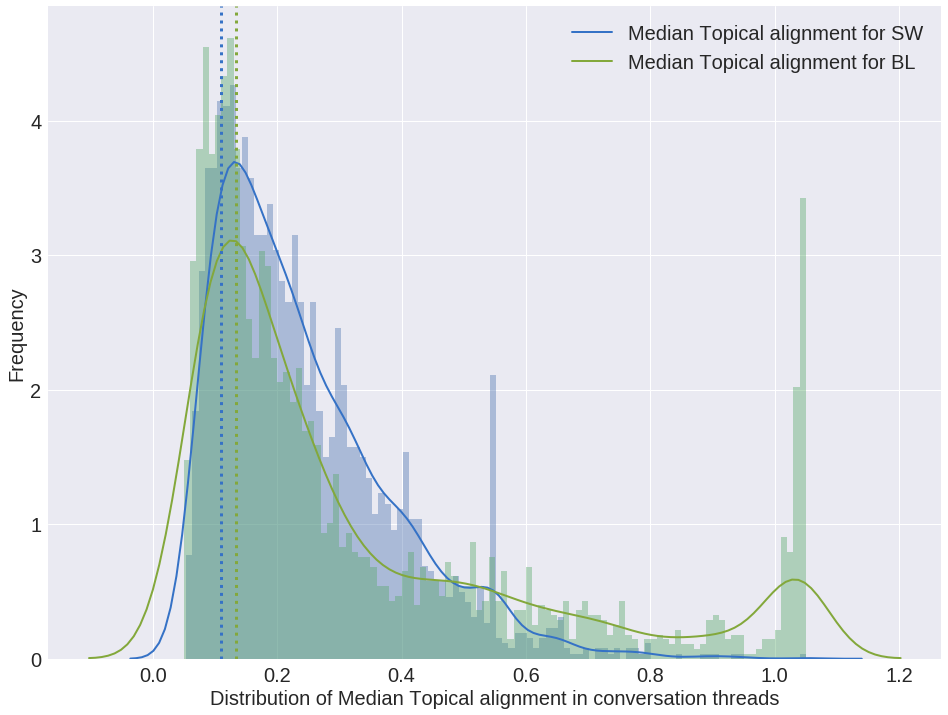

In [262]:
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
sns.set(font_scale=2) 
sns.distplot([i for i in SW_edgeWeights if i > 0.050000000000000044],kde_kws={"color": "b", "lw": 2, "label": "Median Topical alignment for SW"},bins=100)
sns.distplot([i for i in BL_edgeWeights if i > 0.050000000000000044],kde_kws={"color": "g", "lw": 2, "label": "Median Topical alignment for BL"},bins=100)
ax.axvline(x=np.median(SW_edgeWeights), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.median(BL_edgeWeights), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.xlabel("Distribution of Median Topical alignment in conversation threads" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text xticklabel objects>)

(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <a list of 10 Text yticklabel objects>)

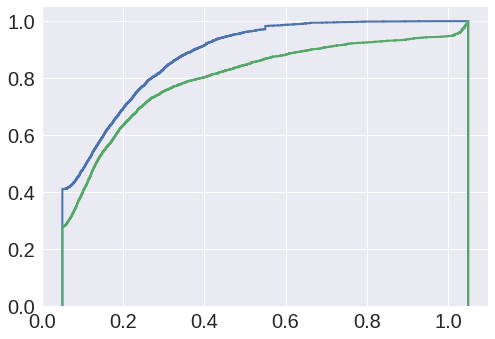

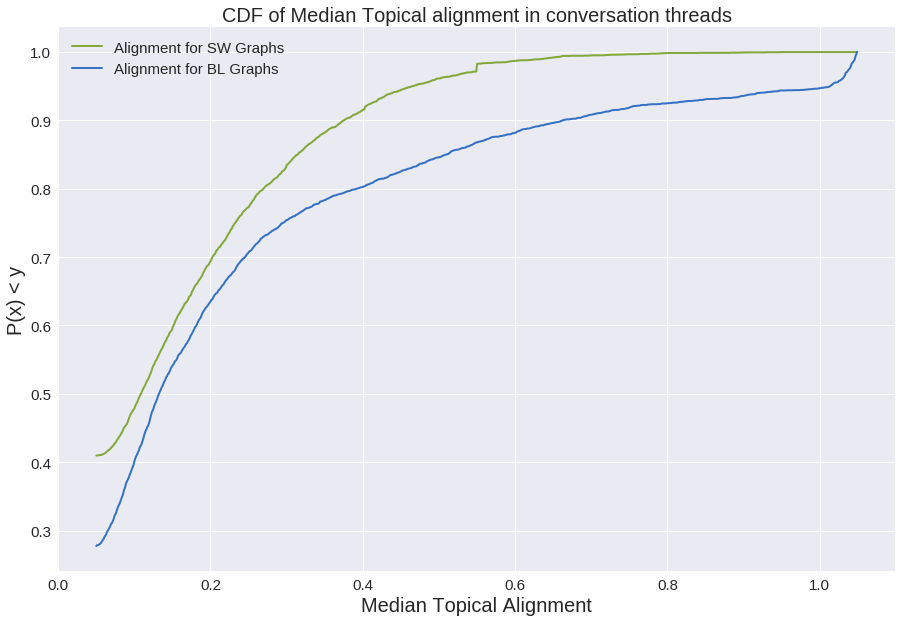

In [263]:
n1 , bins1 , patches1 = plt.hist(SW_edgeWeights, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(BL_edgeWeights, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'g', linewidth=2)
ax.plot(bins2[:-1], n2, 'b', linewidth=2)

plt.title("CDF of Median Topical alignment in conversation threads", fontsize = 20)
plt.xlabel("Median Topical Alignment",fontsize = 20)
plt.ylabel("P(x) < y",fontsize = 20)
plt.legend(['Alignment for SW Graphs','Alignment for BL Graphs'], loc='top left',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [273]:
## this code is extension of Bataglij work on subquadratic triadic census. I am adding a feature to return the nodes in a triad along with vertex tagging.

# triads.py - functions for analyzing triads of a graph
#
# Copyright 2015 NetworkX developers.
# Copyright 2011 Reya Group <http://www.reyagroup.com>
# Copyright 2011 Alex Levenson <alex@isnotinvain.com>
# Copyright 2011 Diederik van Liere <diederik.vanliere@rotman.utoronto.ca>
#
# This file is part of NetworkX.
#
# NetworkX is distributed under a BSD license; see LICENSE.txt for more
# information.
"""Functions for analyzing triads of a graph."""
from __future__ import division

import networkx as nx
import operator

__author__ = '\n'.join(['Alex Levenson (alex@isnontinvain.com)',
                        'Diederik van Liere (diederik.vanliere@rotman.utoronto.ca)','Sagar Joglekar (sagar.joglekar@kcl.ac.uk'])

__all__ = ['my_triadic_census']

#: The names of each type of triad.
TRIAD_NAMES = ('003', '012', '102', '021D', '021U', '021C', '111D', '111U',
               '030T', '030C', '201', '120D', '120U', '120C', '210', '300')

#: The integer codes representing each type of triad.
#:
#: Triads that are the same up to symmetry have the same code.
TRICODES = (1, 2, 2, 3, 2, 4, 6, 8, 2, 6, 5, 7, 3, 8, 7, 11, 2, 6, 4, 8, 5, 9,
            9, 13, 6, 10, 9, 14, 7, 14, 12, 15, 2, 5, 6, 7, 6, 9, 10, 14, 4, 9,
            9, 12, 8, 13, 14, 15, 3, 7, 8, 11, 7, 12, 14, 15, 8, 14, 13, 15,
            11, 15, 15, 16)

#: A dictionary mapping triad code to triad name.
TRICODE_TO_NAME = {i: TRIAD_NAMES[code - 1] for i, code in enumerate(TRICODES)}


def triad_graphs():
    """Returns a dictionary mapping triad name to triad graph."""

    def abc_graph():
        """Returns a directed graph on three nodes, named ``'a'``, ``'b'``, and
        ``'c'``.

        """
        G = nx.DiGraph()
        G.add_nodes_from('abc')
        return G

    tg = {name: abc_graph() for name in TRIAD_NAMES}
    tg['012'].add_edges_from([('a', 'b')])
    tg['102'].add_edges_from([('a', 'b'), ('b', 'a')])
    tg['102'].add_edges_from([('a', 'b'), ('b', 'a')])
    tg['021D'].add_edges_from([('b', 'a'), ('b', 'c')])
    tg['021U'].add_edges_from([('a', 'b'), ('c', 'b')])
    tg['021C'].add_edges_from([('a', 'b'), ('b', 'c')])
    tg['111D'].add_edges_from([('a', 'c'), ('c', 'a'), ('b', 'c')])
    tg['111U'].add_edges_from([('a', 'c'), ('c', 'a'), ('c', 'b')])
    tg['030T'].add_edges_from([('a', 'b'), ('c', 'b'), ('a', 'c')])
    tg['030C'].add_edges_from([('b', 'a'), ('c', 'b'), ('a', 'c')])
    tg['201'].add_edges_from([('a', 'b'), ('b', 'a'), ('a', 'c'), ('c', 'a')])
    tg['120D'].add_edges_from([('b', 'c'), ('b', 'a'), ('a', 'c'), ('c', 'a')])
    tg['120C'].add_edges_from([('a', 'b'), ('b', 'c'), ('a', 'c'), ('c', 'a')])
    tg['120U'].add_edges_from([('a', 'b'), ('c', 'b'), ('a', 'c'), ('c', 'a')])
    tg['210'].add_edges_from([('a', 'b'), ('b', 'c'), ('c', 'b'), ('a', 'c'),
                              ('c', 'a')])
    tg['300'].add_edges_from([('a', 'b'), ('b', 'a'), ('b', 'c'), ('c', 'b'),
                              ('a', 'c'), ('c', 'a')])
    return tg


def _tricode(G, v, u, w):
    """Returns the integer code of the given triad.

    This is some fancy magic that comes from Batagelj and Mrvar's paper. It
    treats each edge joining a pair of ``v``, ``u``, and ``w`` as a bit in
    the binary representation of an integer.

    """
    combos = ((v, u, 1), (u, v, 2), (v, w, 4), (w, v, 8), (u, w, 16),
              (w, u, 32))
    return sum(x for u, v, x in combos if v in G[u])


def my_triadic_census(G):
    """Determines the triadic census of a directed graph.

    The triadic census is a count of how many of the 16 possible types of
    triads are present in a directed graph.

    Parameters
    ----------
    G : digraph
       A NetworkX DiGraph

    Returns
    -------
    census : dict
       Dictionary with triad names as keys and number of occurrences as values.

    Notes
    -----
    This algorithm has complexity `O(m)` where `m` is the number of edges in
    the graph.

    References
    ----------
    .. [1] Vladimir Batagelj and Andrej Mrvar, A subquadratic triad census
        algorithm for large sparse networks with small maximum degree,
        University of Ljubljana,
        http://vlado.fmf.uni-lj.si/pub/networks/doc/triads/triads.pdf

    """
    if not G.is_directed():
        raise nx.NetworkXError('Not defined for undirected graphs.')

    # Initialize the count for each triad to be zero.
    census = {name: 0 for name in TRIAD_NAMES}
    census_nodes = {name: [] for name in TRIAD_NAMES}
    taggedNodes = []
    n = len(G)
    # m = dict(zip(G, range(n)))
    m = {v: i for i, v in enumerate(G)}
    for v in G:
        vnbrs = set(G.pred[v]) | set(G.succ[v])
        for u in vnbrs:
            if m[u] <= m[v]:
                continue
            neighbors = (vnbrs | set(G.succ[u]) | set(G.pred[u])) - {u, v}
            # Calculate dyadic triads instead of counting them.
            if v in G[u] and u in G[v]:
                census['102'] += n - len(neighbors) - 2
#                 census_nodes['102'].append([u,v])
            else:
                census['012'] += n - len(neighbors) - 2
#                 census_nodes['012'].append([u,v])
            # Count connected triads.
            for w in neighbors:
                if m[u] < m[w] or (m[v] < m[w] and m[w] < m[u]
                                   and v not in G.pred[w]
                                   and v not in G.succ[w]):
                    code = _tricode(G, v, u, w)
                    census[TRICODE_TO_NAME[code]] += 1
                    census_nodes[TRICODE_TO_NAME[code]].append([v,u,w])

    # null triads = total number of possible triads - all found triads
    #
    # Use integer division here, since we know this formula guarantees an
    # integral value.
    census['003'] = ((n * (n - 1) * (n - 2)) // 6) - sum(census.values())
    print("Calculation Done!!")
    return census, census_nodes




def getApexNode_201_111D_021U_021D_021C_111U(triad, G):
#     print triad
    degs = [G.degree(i) for i in triad]
    return triad[np.argmax(degs)]


def getThreadLifeTimes(graphs):
    lifetimes = []
    for g in graphs:
        G = graphs[g]
        ts =  nx.get_edge_attributes(G,'time').values()
        ts.sort()
        lifetimes.append(float(ts[-1]) - float(ts[0]) + 1)
    return lifetimes 


def getMotifAges(G, MotifArray):
    ts =  nx.get_edge_attributes(G,'time').values()
    ts.sort()
    ages = []
    for triad in MotifArray:
        triadAge = []
        for node in triad:
            edges = G[node]
            for n in triad:
                if n in edges:
                    age = (float(edges[n]['time']) - float(ts[0]))/(float(ts[-1]) - float(ts[0]))
                    triadAge.append(age)
        ages.append(np.max(triadAge))
    return ages

def findEdgeOrder(edge,sortedEdges):
    count = 0
    for k in sortedEdges:
        if edge == k:
            return float(count)/float(len(sortedEdges))
        count +=1
    return None
            
        
def getMotifOrder(G, MotifArray):
    ts =  nx.get_edge_attributes(G,'time')
    sorted_ts = sorted(ts.items(), key=operator.itemgetter(1))
    ages = []
    for triad in MotifArray:
        triadAge = []
        for node in triad:
            edges = G[node]
            for n in triad:
                if n in edges:
#                     print ((node,n),edges[n]['timestamp'])
                    order = findEdgeOrder(((node,n),edges[n]['time']),sorted_ts)                    
                    triadAge.append(order)
        ages.append(np.max(triadAge))
    return ages



def getTriadicCensus(graphs,keys=None):
    triadicCensus = {}
    triadNodes = {}
    if not keys:
        print "No selector dictionary passed"
        keys = graphs.keys()
    for g in keys:
        census, triads = my_triadic_census(graphs[g])
#         denom = len(graphs[g].nodes())+1
        
        triadicCensus[g] = {}
        triadicCensus[g] = census
        triadNodes[g] = {}
        triadNodes[g] = triads
#         for k in triadicCensus[g]:
#             triadicCensus[g][k]= float(triadicCensus[g][k])/float(denom)
    return triadicCensus , triadNodes


def getMotifLifeTimes(Graphs, allTriadNodes):
    lifetimeArray= { '111D' : [] , '201' : [] , '021U' : [] , '021D' : [] , '021C' : [] , '111U' : [] }
    for k in allTriadNodes:
        for m in lifetimeArray.keys():
#             lifeTimes = getMotifOrder(Graphs[k], allTriadNodes[k][m])
            lifeTimes = getMotifAges(Graphs[k], allTriadNodes[k][m])
            lifetimeArray[m]+=lifeTimes
    return lifetimeArray

def getApexNodeStat(Graphs , allTriadNodes , opAuthors):
    apexNodeArray= { '111D' : [] , '201' : [] , '021U' : [] , '021D' : [] , '021C' : [] , '111U' : [] }
    for k in allTriadNodes:
        if k in opAuthors:
            for m in apexNodeArray.keys():
                count = 0.0
                frac = 0.0
                for triad in allTriadNodes[k][m]:
                    apexNode = getApexNode_201_111D_021U_021D_021C_111U(triad,Graphs[k])
                    if apexNode == opAuthors[k]:
                        count+=1
                if len(allTriadNodes[k][m]) > 0:
                    frac = count/float(len(allTriadNodes[k][m]))
                apexNodeArray[m].append(frac)
    return apexNodeArray

u'Functions for analyzing triads of a graph.'

In [266]:
triads_SW , triadNodes_SW = getTriadicCensus(topicUserGraphs_Suicide)

No selector dictionary passed
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
C

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

In [267]:
triads_BL , triadNodes_BL = getTriadicCensus(topicUserGraphs_Manchester)

No selector dictionary passed
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
C

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

In [275]:
# SW_motif_ages = getMotifLifeTimes(topicUserGraphs_Suicide, triadNodes_SW)

In [276]:
triad_names = ['003', '012', '102', '021D', '021U', '021C', '111D', '111U','030T', '030C', '201', '120D', '120U', '120C', '210', '300']
dim = triad_names[7]
SW_vals = [triads_SW[k][dim] for k in triads_SW]
BL_vals = [triads_BL[k][dim] for k in triads_BL]

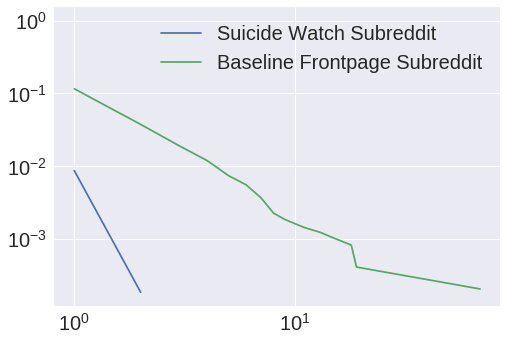

In [277]:
x , y = powerlaw.ccdf(SW_vals)
x2,y2 = powerlaw.ccdf(BL_vals)
plt.loglog(x,y)
plt.loglog(x2,y2)
plt.legend(['Suicide Watch Subreddit', 'Baseline Frontpage Subreddit'])

In [288]:
from scipy.stats import sem

def getSizeDict(graphs):
    sizes = {}
    for k in graphs:
        sizes[k] = len(graphs[k].nodes())
    return sizes 

def getRandomGraphCensus(n , p , graphCount ):
    graphs= {}
    for k in range(graphCount):
        g = nx.erdos_renyi_graph(n, p, seed=None, directed=True)
        graphs[str(k)] = g
    randomCensus = getTriadicCensus(graphs)
    return randomCensus, graphs

def getRandomRangedGraphCensus(nstart , nstop ,  p,  graphCountPernode ):
    graphs= {}
    for k in range(nstart,nstop):
        for j in range(graphCountPernode):
            g = nx.erdos_renyi_graph(k, p, seed=None, directed=True)
            graphs[str(k) + '_' + str(j)] = g
    randomCensus = getTriadicCensus(graphs)
    return randomCensus, graphs
    
    
def getNodeMotifSpread(graphs , listSizeSpread):
    sizes = {}
    for k in graphs:
        sizes[k] = len(graphs[k].nodes())
    census_graph = {}
    census_random = {}
    #iterate through graph size spread
    for s in listSizeSpread:
        print "Working with Size %d" %s
        subset_graphs = dict()
        for k in sizes:
            if sizes[k] == s:
                subset_graphs[k] = graphs[k]
        print "Working with %d Selected Graphs" %len(subset_graphs.keys())
        randomCensus = getRandomGraphCensus(len(subset_graphs.keys()),0.2,s)
        graphCensus = getTriadicCensus(subset_graphs)
        
        census_graph[s] = graphCensus
        census_random[s] = randomCensus
    return census_graph , census_random

def getNodeMotifBinnedSpread(graphs , startNodeCount , stopNodeCount, binSize):
    sizes = {}
    for k in graphs:
        sizes[k] = len(graphs[k].nodes())
    census_graph = {}
    #iterate through graph size spread
    binCount = 0
    for (start,stop) in zip(range(startNodeCount,stopNodeCount,binSize),range(startNodeCount+binSize,stopNodeCount+binSize,binSize)):
        print "Working with Size %d - %d"%(start,stop)
        subset_graphs = dict()
        for k in sizes:
            if (sizes[k] > start and sizes[k]<=stop):
                subset_graphs[k] = graphs[k]
        print "Working with %d Selected Graphs" %len(subset_graphs.keys())
        
        graphCensus = getTriadicCensus(subset_graphs)
        census_graph[binCount] = graphCensus
        binCount+=1
    return census_graph , binCount


def getCountsForMotifs(censusSpread,MotifKey):
    Counts = {}
    errors = {}
    for k in censusSpread:
        presence = 0
        count = [0]
        for g in censusSpread[k][0]:
#             print censusSpread[k][0].keys()
            if censusSpread[k][0][g][MotifKey] > 0:
#                 presence+=censusSpread[k][g][MotifKey]
                count.append(censusSpread[k][0][g][MotifKey])
#         Counts[k] = float(presence)/float(len(censusSpread[k].keys()))
        Counts[k] = np.mean(count)
        errors[k] = sem(count)
    return Counts , errors


def getAllMotifCounts(spread , motifKey , nodeNumbers):
    counts = []
    for k in spread[nodeNumbers]:
        if motifKey in spread[nodeNumbers][k]:
            counts.append(spread[nodeNumbers][k][motifKey])
    return counts


def calculateZscore(TargetSpread , baselineSpread):
    triad_names = ['003', '012', '102', '021D', '021U', '021C', '111D', '111U','030T', '030C', '201', '120D', '120U', '120C', '210', '300']
    Zscores = {}
    for k in TargetSpread:
        for motifKey in triad_names:
            if motifKey not in Zscores:
                Zscores[motifKey] = []
            target = getAllMotifCounts(TargetSpread,motifKey,k)
            baseline = getAllMotifCounts(baselineSpread,motifKey,k)
            
            std = np.std(baseline)
            print std , len(baseline)
            
            z = (float(np.sum(target)) - float(np.sum(baseline)))/std
            Zscores[motifKey].append(z)
    return Zscores

In [289]:
randomCensus, Random_graphs = getRandomRangedGraphCensus(3, 10 ,0.3,100)

No selector dictionary passed
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
C

In [294]:
# randomCensus[1]
len(topicUserGraphs_Suicide)

5413

In [296]:
SW_census_spread , bins = getNodeMotifBinnedSpread(topicUserGraphs_Suicide ,binSize=1 ,startNodeCount=3 , stopNodeCount=10 )

Working with Size 3 - 4
Working with 35 Selected Graphs
No selector dictionary passed
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Working with Size 4 - 5
Working with 12 Selected Graphs
No selector dictionary passed
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation

In [297]:
BL_census_spread , bins = getNodeMotifBinnedSpread(topicUserGraphs_Manchester ,binSize=1 ,startNodeCount=3 , stopNodeCount=10)

Working with Size 3 - 4
Working with 470 Selected Graphs
No selector dictionary passed
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
C

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

In [303]:
R_census_spread , bins = getNodeMotifBinnedSpread(Random_graphs ,binSize=1 ,startNodeCount=3 , stopNodeCount=10)

Working with Size 3 - 4
Working with 100 Selected Graphs
No selector dictionary passed
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
C

Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation Done!!
Calculation 

In [316]:
bins

7

In [304]:
def getSequentialValues(presenceCensus , spread):
    return [presenceCensus[k] for k in spread]

In [305]:
keys = nx.triadic_census(topicUserGraphs_Suicide[topicUserGraphs_Suicide.keys()[160]]).keys()
print keys

['201', '021C', '021D', '210', '120U', '030C', '003', '300', '012', '021U', '120D', '102', '111U', '030T', '120C', '111D']


In [306]:
triad_names = ['003', '012', '102', '021D', '021U', '021C', '111D', '111U','030T', '030C', '201', '120D', '120U', '120C', '210', '300']

In [366]:
dim = triad_names[6]
BL_presenceRatio , BL_errors = getCountsForMotifs(BL_census_spread,dim)
R_Ratio, R_errors = getCountsForMotifs(R_census_spread,dim)
SW_presenceRatio, SW_errors = getCountsForMotifs(SW_census_spread,dim)

In [367]:
print getSequentialValues(SW_presenceRatio, range(bins))#[10 , 12 , 15 , 18 , 20 , 22 ,  25 , 28, 30])
print getSequentialValues(BL_presenceRatio, range(bins))#[10 , 12 , 15 , 18 , 20 , 22 ,  25 , 28, 30])
print getSequentialValues(R_Ratio,range(bins))#[10 , 12 , 15 , 18 , 20 , 22 ,  25 , 28, 30])

[1.0, 1.6, 0.0, 0.0, 2.0, 0.0, 0.0]
[1.8444444444444446, 2.9876543209876543, 4.2727272727272725, 5.684210526315789, 7.5, 8.794871794871796, 10.205882352941176]
[1.1904761904761905, 1.391304347826087, 1.8032786885245902, 2.5063291139240507, 3.741573033707865, 4.542553191489362, 0.0]


In [368]:
def getXticks(startNodeCount , stopNodeCount, binSize):
    ticks = []
    for (start,stop) in zip(range(startNodeCount,stopNodeCount,binSize),range(startNodeCount+binSize,stopNodeCount+binSize,binSize)):
        ticks.append(str(start)+"-"+str(stop-1))
    return ticks

<Container object of 7 artists>

<Container object of 7 artists>

<Container object of 7 artists>

([<matplotlib.axis.XTick at 0x7f86a64d0cd0>,
 <a list of 7 Text xticklabel objects>)

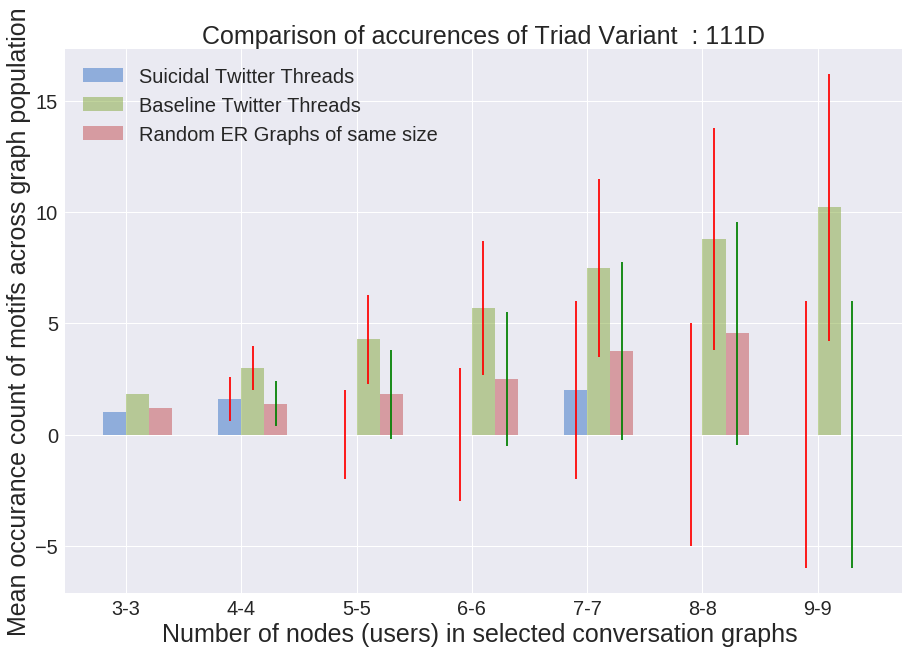

In [369]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.title("Comparison of accurences of Triad Variant  : " + dim, fontsize = 25)
plt.xlabel("Number of nodes (users) in selected conversation graphs ",fontsize = 25)
plt.ylabel("Mean occurance count of motifs across graph population",fontsize = 25)
x = np.arange(bins)
y1 = getSequentialValues(SW_presenceRatio, range(bins))
y2 = getSequentialValues(BL_presenceRatio, range(bins))
y3 = getSequentialValues(R_Ratio, range(bins))
ax.bar(x-0.1, y1 ,width=0.2, color='b',yerr = SW_errors, align='center', alpha=0.5, ecolor='red', capsize=10)
ax.bar(x+0.1, y2 ,width=0.2, color='g',yerr = BL_errors, align='center', alpha=0.5, ecolor='red', capsize=10)
ax.bar(x+0.3, y3 ,width=0.2, color='r',yerr = R_errors, align='center', alpha=0.5, ecolor='green', capsize=10)

# plt.plot(getSequentialValues(SW_presenceRatio, range(bins)))#[10 , 12 , 15 , 18 , 20 , 22 ,  25 , 28, 30]))
# plt.errorbar(getSequentialValues(SW_presenceRatio, range(bins)), np.arange(1,40,3), yerr=SW_errors, fmt='.k')
# plt.plot(getSequentialValues(BL_presenceRatio, range(bins)))#[10 , 12 , 15 , 18 , 20 , 22 ,  25 , 28, 30]))

plt.xticks(np.arange(bins), getXticks(3,10,1))
plt.legend(['Suicidal Twitter Threads', 'Baseline Twitter Threads' , 'Random ER Graphs of same size'])